# Figure used for Illustrating Simulated Data

In [11]:
# import relevant packages 
from src.data.create_simulated_data import SimulateData
from src.data.data_statistics import get_acf, get_df 
from src.data.preprocess_utils import read_ns5_file
from scipy.stats import beta, norm, lognorm
from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt 
from scipy.signal import welch
import seaborn as sns 
import numpy as np 
import os 

sns.set_theme()

rcParams = {
    "font.family": "serif",  # use serif/main font for text elements
    'text.usetex': True,
    'font.size': 8,
    'axes.labelsize': 7,
    'axes.titlesize': 9,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 7,
    'axes.labelpad': 1,
    'axes.axisbelow': True,  # draw gridlines below other elements
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        r"\usepackage{url}",            # load additional packages
        r"\usepackage{amsmath,amssymb}",   # unicode math setup
        #  r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
}
plt.rcParams.update(rcParams)

figdir = "../../../figures/data/"
def savefig(fig, name, width=6, height=4):
    # apply rcParams
    fig.set_size_inches(width, height)
    fig.savefig(figdir + name + ".pdf", bbox_inches='tight')

**SA**

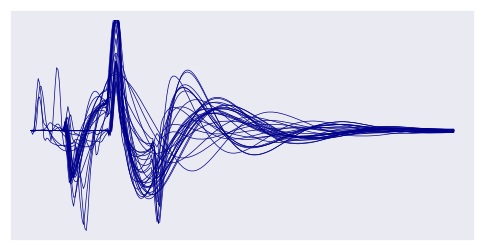

In [ ]:
SA_options = np.load("../data/noise_files_sim_data/SA_time.npy")
fig = plt.figure(figsize=(6, 3))
plt.plot(SA_options.T, color ="darkblue", linewidth=0.5)
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "stim_data_SA", width=21/6.5, height=21/6.5*0.55)

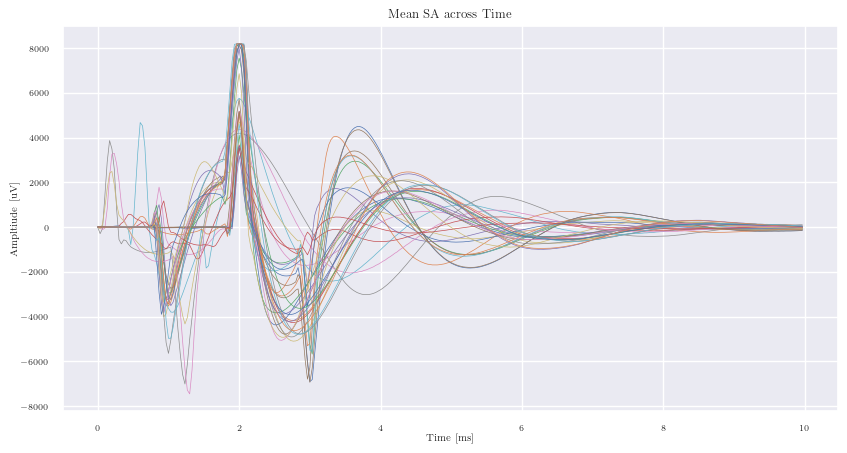

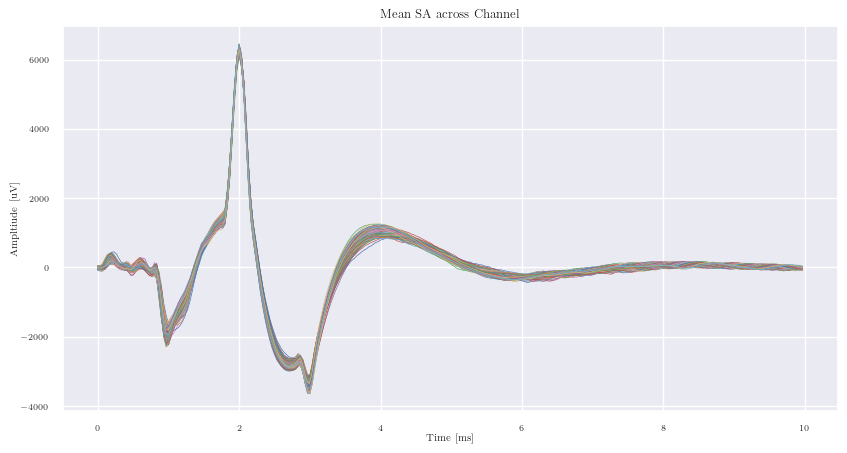

In [65]:
SA_options1 = np.load("../data/noise_files_sim_data/SA_time.npy")
SA_options2 = np.load("../data/noise_files_sim_data/SA_channel.npy")

x_axis = np.arange(0, 300) / 30 
fig = plt.figure(figsize=(10, 5))
plt.plot(x_axis, SA_options1.T, linewidth = 0.5)
plt.xlabel("Time [ms]")
plt.ylabel("Ampltiude [uV]")
plt.title("Mean SA across Time")
plt.show()
savefig(fig, "stim_data_SA_time", width=2.8, height=1.5)

fig = plt.figure(figsize=(10, 5))
plt.plot(x_axis, SA_options2.T, linewidth = 0.5)
plt.xlabel("Time [ms]")
plt.ylabel("Ampltiude [uV]")
plt.title("Mean SA across Channel")
plt.show()
savefig(fig, "stim_data_SA_channel", width=2.8, height=1.5)

**CAP**

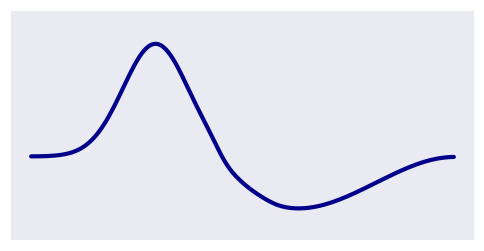

In [28]:
y1 = norm.pdf(np.linspace(-2, 1, 80), 0, 0.5)# beta.pdf(np.linspace(0, 1, 100), 2, 3)
y2 = beta.pdf(np.linspace(0, 1, 100), 2, 3)
Y = np.r_[4*y1, -0.8*y2]
Y[len(Y)//2-10:len(Y) // 2 + 10] = gaussian_filter1d(Y[len(Y)//2-10:len(Y) // 2 + 10], 4)
Y = gaussian_filter1d(Y, 4)
Y /= np.max(Y)
# Y *= 30 

x_axis = np.arange(0, len(Y)) / 30
fig = plt.figure(figsize = (6, 3))
plt.plot(x_axis, Y, linewidth = 3, color = "darkblue")
plt.ylim([-0.75, 1.3])
plt.yticks([])
plt.xticks([])
plt.show()

savefig(fig, "stim_data_CAP1", width=21/6.5, height=21/6.5*0.55)

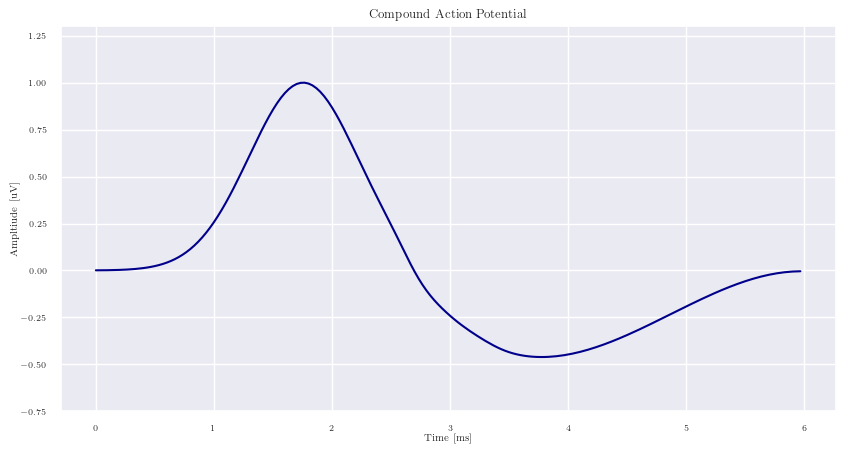

In [63]:
y1 = norm.pdf(np.linspace(-2, 1, 80), 0, 0.5)# beta.pdf(np.linspace(0, 1, 100), 2, 3)
y2 = beta.pdf(np.linspace(0, 1, 100), 2, 3)
Y = np.r_[4*y1, -0.8*y2]
Y[len(Y)//2-10:len(Y) // 2 + 10] = gaussian_filter1d(Y[len(Y)//2-10:len(Y) // 2 + 10], 4)
Y = gaussian_filter1d(Y, 4)
Y /= np.max(Y)
# Y *= 30 

x_axis = np.arange(0, len(Y)) / 30
fig = plt.figure(figsize = (10, 5))
plt.plot(x_axis, Y, linewidth = 1.5, color = "darkblue")
plt.ylim([-0.75, 1.3])
plt.xlabel("Time [ms]")
plt.ylabel("Ampltiude [uV]")
plt.title("Compound Action Potential")
plt.savefig("../../../figures/stim_data_CAP_report.pdf")
plt.show()

savefig(fig, "stim_data_CAP_report", width=2.8, height=1.5)

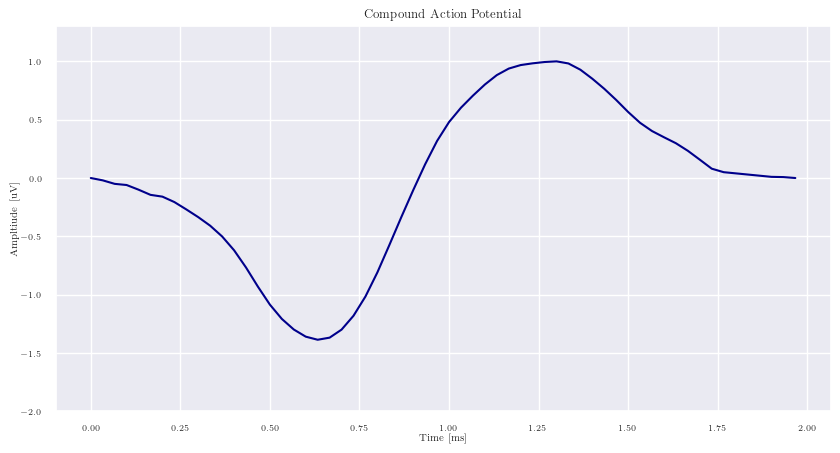

In [64]:
Y = np.load("../data/noise_files_sim_data/CAP2.npy")

x_axis = np.arange(0, len(Y)) / 30
fig = plt.figure(figsize = (10, 5))
plt.plot(x_axis, Y, linewidth = 1.5, color = "darkblue")
plt.ylim([-2, 1.3])
plt.xlabel("Time [ms]")
plt.ylabel("Ampltiude [uV]")
plt.title("Compound Action Potential")
plt.show()

savefig(fig, "stim_data_CAP2_report", width=2.8, height=1.5)

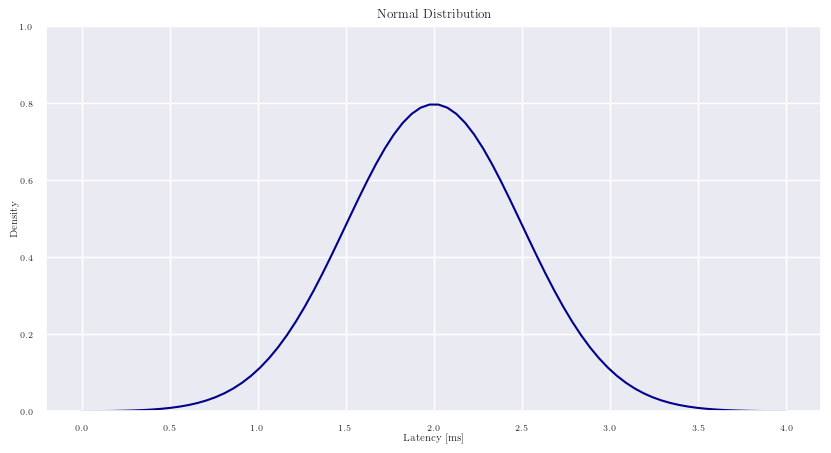

In [29]:
# draw from normal distribution
normal = norm.pdf(np.linspace(-2, 2, 80), 0, 0.5)

x_axis = np.arange(0, len(Y)) / 30
fig = plt.figure(figsize = (10, 5))
plt.plot(np.linspace(0, 4, 80), normal, linewidth = 1.5, color = "darkblue")
plt.ylim([0, 1])
plt.xlabel("Latency [ms]")
plt.ylabel("Density")
plt.title("Normal Distribution")
plt.show()

savefig(fig, "normal_dist", width=1.65, height = 1.65 * 0.55)

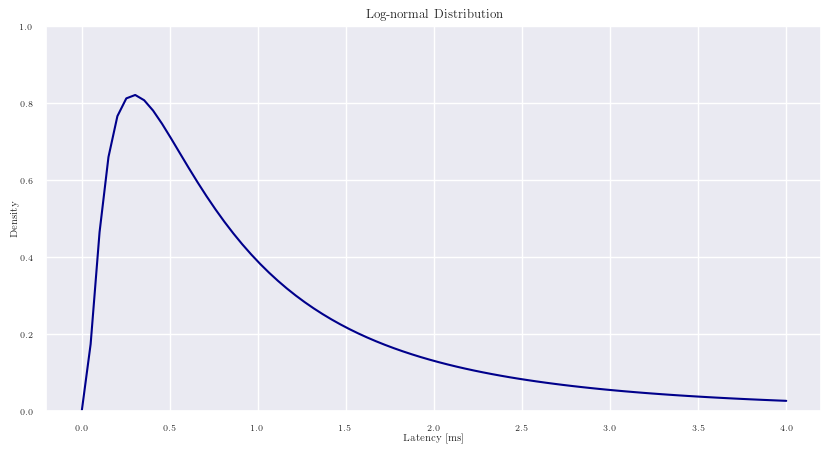

In [28]:
# draw from normal distribution
log_normal = lognorm.pdf(np.linspace(0, 4, 80), 1, scale = 0.8)

x_axis = np.arange(0, len(Y)) / 30
fig = plt.figure(figsize = (10, 5))
plt.plot(np.linspace(0, 4, 80), log_normal, linewidth = 1.5, color = "darkblue")
plt.ylim([0, 1])
plt.xlabel("Latency [ms]")
plt.ylabel("Density")
plt.title("Log-normal Distribution")
plt.show()

savefig(fig, "log_normal_dist", width=1.65, height = 1.65* 0.55)

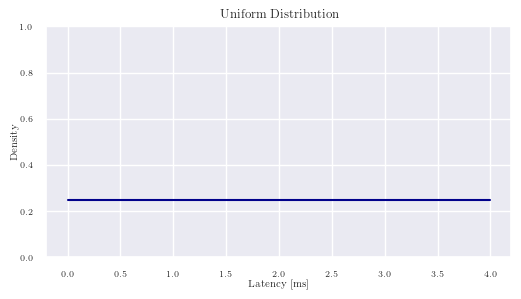

In [27]:
# draw from normal distribution
uniform = np.ones(5) / 4 

x_axis = np.arange(0, len(Y)) / 30
fig = plt.figure(figsize = (6, 3))
plt.plot([0, 1, 2, 3, 4], uniform, linewidth = 1.5, color = "darkblue")
plt.ylim([0, 1])
plt.xlabel("Latency [ms]")
plt.ylabel("Density")
plt.title("Uniform Distribution")
plt.show()

savefig(fig, "uniform", width=1.65, height = 1.65 * 0.55)

**Noise**

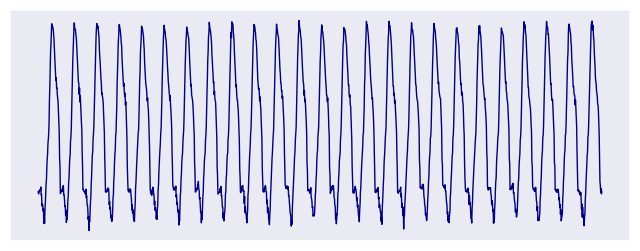

In [63]:
noise_500 = np.load("../data/noise_files_sim_data/500_Hz.npy")
fig = plt.figure(figsize = (8, 3))
plt.plot(noise_500[:1500], linewidth = 1, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "stim_data_noise1", width = 21/6.5, height=21/6.5*0.45)

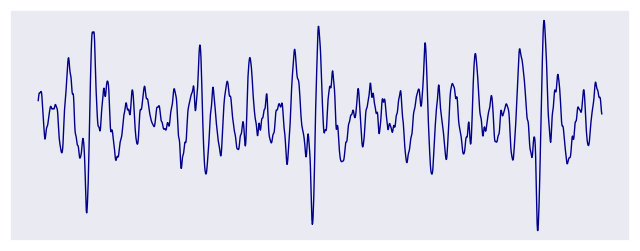

In [32]:
# PLI
pli_signal = np.load("../data/noise_files_sim_data/PLI.npy")

fig = plt.figure(figsize = (8, 3))
plt.plot(pli_signal[:1500], linewidth = 1, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "stim_data_PLI", width = 21/6.5, height=21/6.5*0.45)


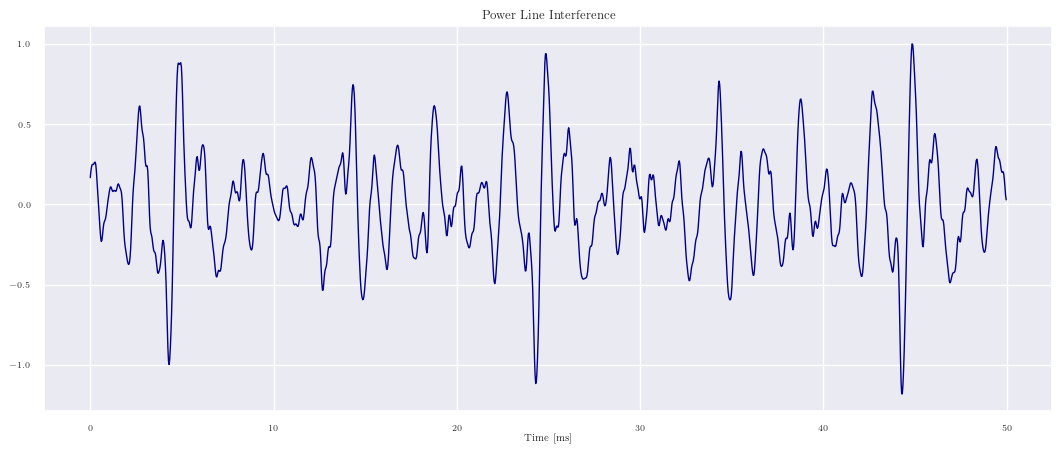

In [70]:
# PLI
pli_signal = np.load("../data/noise_files_sim_data/PLI.npy")
x_axis = np.arange(0, len(pli_signal)) / 30

fig = plt.figure(figsize = (13, 5))
plt.plot(x_axis[:1500], pli_signal[:1500], linewidth = 1, color = "darkblue")
plt.xlabel("Time [ms]")
plt.title("Power Line Interference")
plt.show()

savefig(fig, "stim_data_PLI_report", width = 11/2.54, height=11/2.54*0.45)

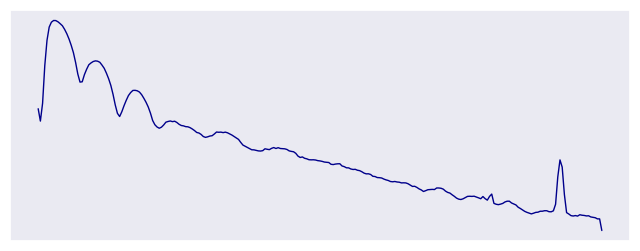

In [34]:
# high frequency noise
times, data = read_ns5_file("../../data/raw/Ramp data/Eye 3/ramp_file6.ns5")

p, fxx = welch(np.mean(data, axis = 1), fs = 30000, nperseg = 512)

fig = plt.figure(figsize = (8, 3))
plt.plot(p, 20 * np.log(fxx), linewidth = 1, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "stim_data_noise3", width = 21/6.5, height=21/6.5*0.45)



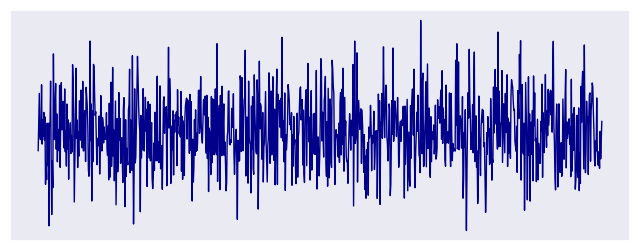

In [42]:
# white noise 
white_noise = np.random.normal(0, 1, 1000)
fig = plt.figure(figsize = (8, 3))
plt.plot(white_noise, color = "darkblue", linewidth = 1)
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "stim_data_noise4", width = 21/6.5, height=21/6.5*0.45)

**Signal**

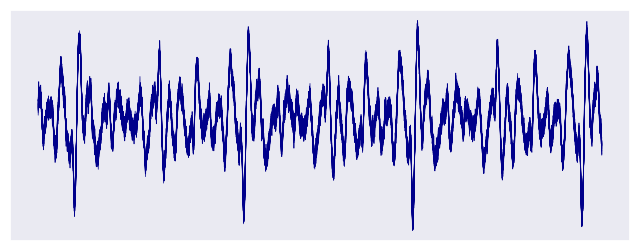

In [65]:
# Only with stimulation artifacts 
os.chdir("../data")
simulator = SimulateData(noise_params = [200, 1, 10, 0.3], SNR = 0, stim_freq=10, stim_amp = 0, CAP_freq = 40, CAP_dist="lognormal")
simulator.construct_signal()

fig = plt.figure(figsize = (8, 3))
plt.plot(simulator.signal[:2000], linewidth = 0.5, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "stim_data_signal1", width = 21/6.5, height=21/6.5*0.45)

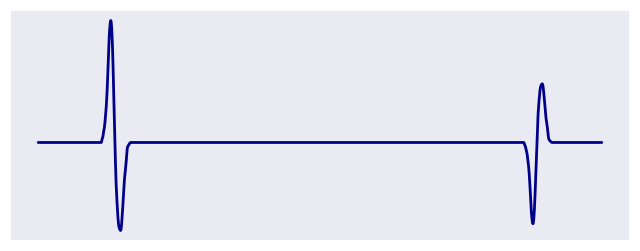

In [54]:
# stimulation artifacts and cap 
simulator = SimulateData(noise_params = [200, 1, 10, 0.3], SNR = 1, stim_freq=10, stim_amp = 0, CAP_freq = 4, CAP_dist="uniform")
simulator.construct_signal()
true_signal = simulator.true_signal

fig = plt.figure(figsize = (8, 3))
plt.plot(true_signal[:4000, 0], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "stim_data_signal2", width = 21/6.5, height=21/6.5*0.45)

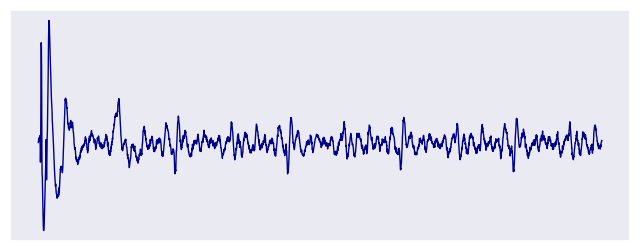

In [62]:
# whole signal 
simulator = SimulateData(noise_params = [200, 1, 10, 0.3], SNR = 15, stim_freq=10, stim_amp = 1000, CAP_freq = 4, CAP_dist="uniform")
simulator.construct_signal()


fig = plt.figure(figsize = (8, 3))
plt.plot(simulator.signal[3000:6000, 0], linewidth = 1, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "stim_data_signal3", width = 21/6.5, height=21/6.5*0.45)

**Comparison to real**

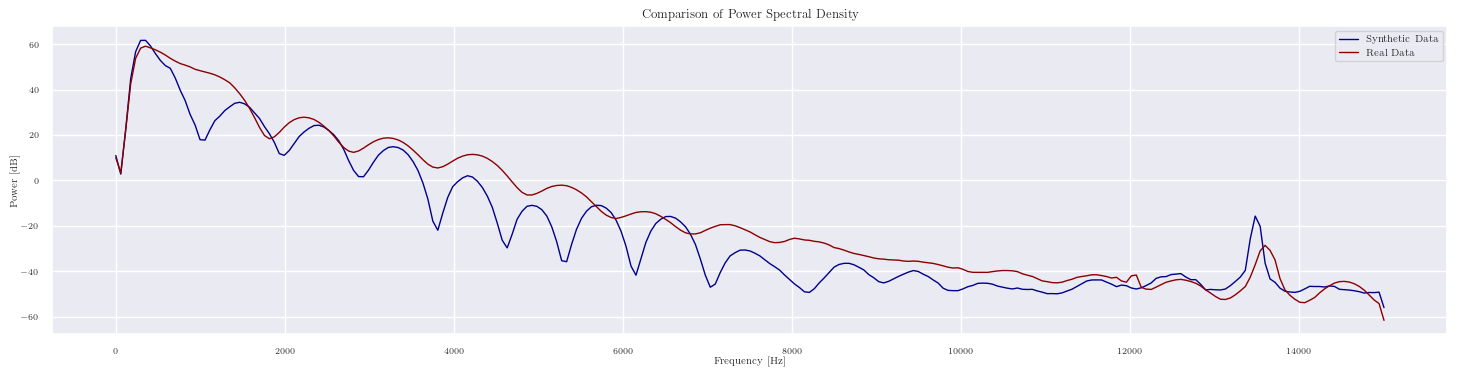

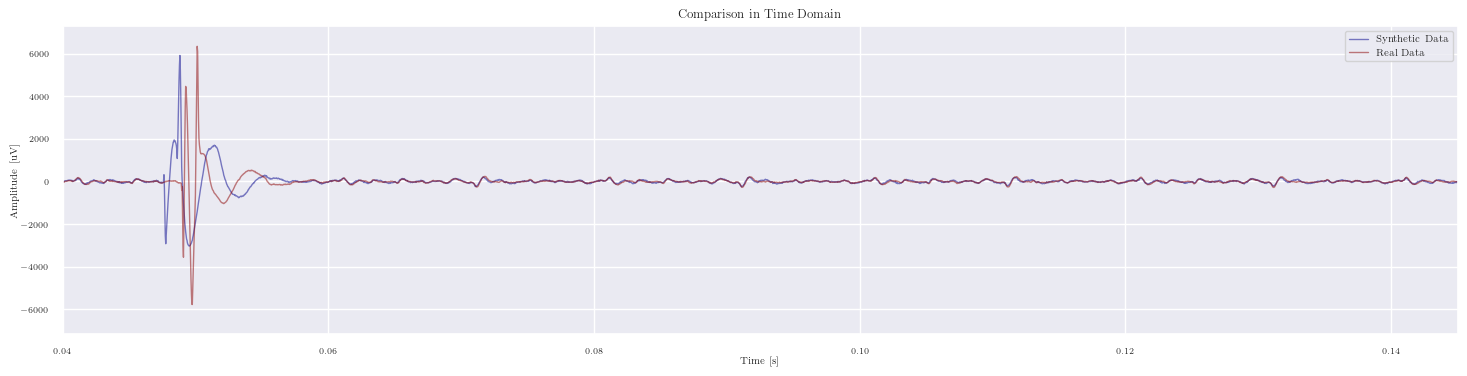

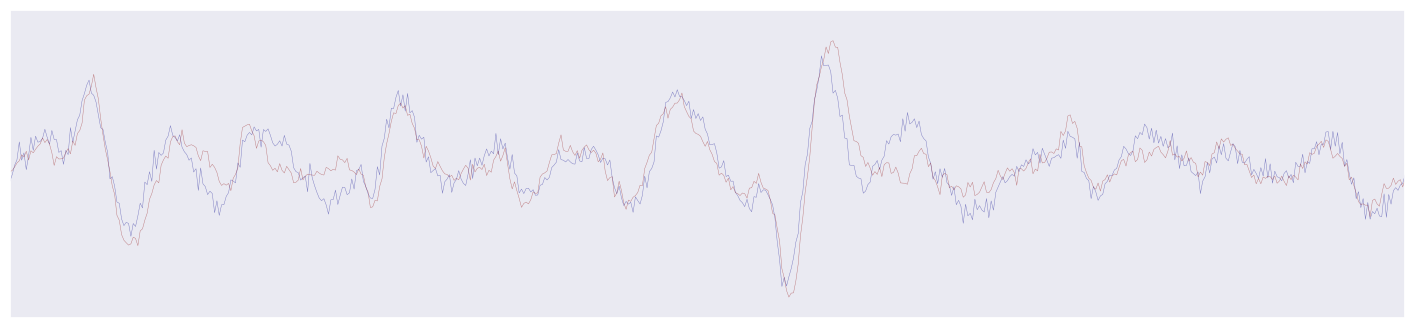

In [3]:
# read real data 
times, data = read_ns5_file("../../data/raw/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5")

# create simulated data
try: 
    os.chdir("../../src/data")
except: 
    pass 
simulator = SimulateData(seed = 10, noise_params = [200, 1, 10, 15])
simulator.construct_signal()

# choose channel
channel = 12 

# compute psd 
f_sim, P_sim = welch(simulator.signal[:, channel], fs = 30000, nperseg = 512)
f_real, P_real = welch(data[:, channel], fs = 30000, nperseg = 512)

fig = plt.figure(figsize = (18, 4))
plt.plot(f_sim, 10 * np.log(P_sim), linewidth = 1, color = "darkblue")
plt.plot(f_real, 10 * np.log(P_real), linewidth = 1, color = "darkred")
plt.legend(["Synthetic Data", "Real Data"])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [dB]")
plt.title("Comparison of Power Spectral Density")
plt.show()

savefig(fig, "comparison_psd_stim_real", width = 6, height=1.5)

fig = plt.figure(figsize = (18, 4))
plt.plot(np.arange(6000) / simulator.fs, simulator.signal[1595:7595, channel], linewidth = 1, color = "darkblue", alpha = 0.5)
plt.plot(np.arange(6000) / simulator.fs, data[3000:9000, channel], linewidth = 1, color = "darkred", alpha = 0.5)
plt.xlim([0.04, 0.145])
plt.legend(["Synthetic Data", "Real Data"])
plt.xlabel("Time [s]")
plt.ylabel(f"Amplitude [uV]")
plt.title("Comparison in Time Domain")
plt.show()

savefig(fig, "comparison_time_stim_real", width = 6, height = 2)

fig = plt.figure(figsize = (18, 4))
plt.plot(np.arange(6000) / simulator.fs, simulator.signal[1595:7595, channel], linewidth = 0.3, color = "darkblue", alpha = 0.5)
plt.plot(np.arange(6000) / simulator.fs, data[3000:9000, channel], linewidth = 0.3, color = "darkred", alpha = 0.5)
plt.xlim([0.06, 0.08])
plt.ylim([-300, 300])
plt.yticks([])
# plt.xticks([0.06, 0.065, 0.07, 0.075, 0.08])
plt.xticks([])
plt.show()

savefig(fig, "comparison_timezoom_stim_real", width = 2, height = 0.5)

**Print Statistics**

In [17]:
# print minimum values
print(f"min values: {np.min(data[:, channel]), np.min(simulator.signal[:, channel])}")
print(f"max values: {np.max(data[:, channel]), np.max(simulator.signal[:, channel])}")
print(f"IQR values: {np.percentile(data[:, channel], 75) - np.percentile(data[:, channel], 25), np.percentile(simulator.signal[:, channel], 75) - np.percentile(simulator.signal[:, channel], 25)}")
print(f"DF value: {get_df(data)[0], get_df(simulator.signal)[0]}")
print(f"ACF value: {get_acf(data), get_acf(simulator.signal)}")

min values: (-7232.5, -3066.4212929731048)
max values: (7246.75, 5947.765157196207)
IQR values: (81.75, 89.01400400924076)
DF value: (344.23828125, 397.3388671875)
ACF value: (array([1.        , 0.97889356, 0.92792473]), array([1.        , 0.97798556, 0.92439107]))
